In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

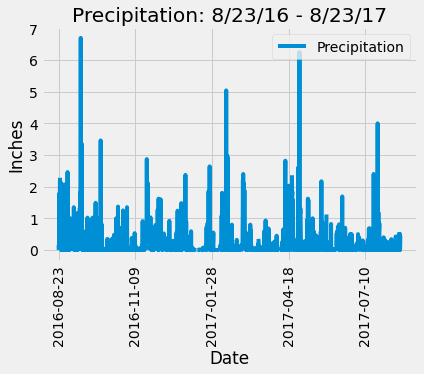

In [86]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
year_precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime('%Y-%m-%d',Measurement.date) >= year_ago_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation = pd.DataFrame(year_precipitation, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation.set_index('Date', inplace = True)
precipitation.head(15)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation.plot(title= 'Precipitation: 8/23/16 - 8/23/17')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.legend(loc = 'upper right')
plt.show()

In [87]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [88]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station).count()
print(f'There are {total_stations} stations')

There are 9 stations


In [89]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station))\
                    .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [90]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281')\
                .order_by(Measurement.tobs.asc()).first()
lowest_temp = lowest_temp[0]

highest_temp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281')\
                .order_by(Measurement.tobs.desc()).first()
highest_temp = highest_temp[0]

avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = '{0:.3}'.format(avg_temp[0][0])

print(f'Lowest temparature = {lowest_temp} degrees F')
print(f'Highest temperature = {highest_temp} degrees F')
print(f'Average temperature = {avg_temp} degrees F')

Lowest temparature = 54.0 degrees F
Highest temperature = 85.0 degrees F
Average temperature = 71.7 degrees F


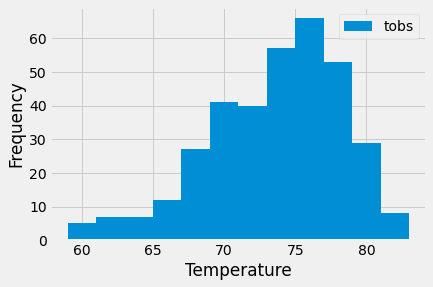

In [91]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_tobs = session.query(Measurement.date, Measurement.tobs).\
            filter(func.strftime('%Y-%m-%d',Measurement.date) >= year_ago_date).filter(Measurement.station == 'USC00519281')\
            .order_by(Measurement.date).all()

tobs = pd.DataFrame(year_tobs)
tobs.set_index('date')

tobs.plot(kind = 'hist', bins = 12)
plt.xlabel('Temperature')
plt.show()

# Close session

In [92]:
# Close Session
session.close()